In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as an
import scipy
import sklearn
import gget

sc.settings.verbosity = 3  

In [2]:
fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell_fibroblast/scanpy/processed.anndata.h5ad"

adata = sc.read_h5ad(fpath)
adata.var_names = adata.var['gene_name'].values
adata.obs['cell'] = adata.obs.index.copy()
sc.logging.print_memory_usage()

adata

Memory usage: current 2.47 GB, difference +2.47 GB


AnnData object with n_obs × n_vars = 7748 × 14082
    obs: 'n_genes', 'cell', 'G1', 'G2M', 'S', 'pred_phase', 'seurat_S_score', 'seurat_G2M_score', 'is_kegg_score', 'whitfield_G1/S_score', 'whitfield_G2_score', 'whitfield_G2/M_score', 'whitfield_M/G1_score', 'whitfield_S_score', 'GO_G1_score', 'GO_G1/S_score', 'GO_G2_score', 'GO_G2/M_score', 'GO_M_score', 'GO_S_score', 'cell_cycle_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden', 'pred_G1', 'pred_S', 'pred_G2M', 'dpt_pseudotime'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'seurat_S', 'seurat_G2M', 'is_kegg', 'whitfield_G1/S', 'whitfield_G2', 'whitfield_G2/M',

In [3]:
# drop clusters 2 and 3

adata = adata[adata.obs['leiden'].isin(["0", "1"]), :].copy()
adata

AnnData object with n_obs × n_vars = 7080 × 14082
    obs: 'n_genes', 'cell', 'G1', 'G2M', 'S', 'pred_phase', 'seurat_S_score', 'seurat_G2M_score', 'is_kegg_score', 'whitfield_G1/S_score', 'whitfield_G2_score', 'whitfield_G2/M_score', 'whitfield_M/G1_score', 'whitfield_S_score', 'GO_G1_score', 'GO_G1/S_score', 'GO_G2_score', 'GO_G2/M_score', 'GO_M_score', 'GO_S_score', 'cell_cycle_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden', 'pred_G1', 'pred_S', 'pred_G2M', 'dpt_pseudotime'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'seurat_S', 'seurat_G2M', 'is_kegg', 'whitfield_G1/S', 'whitfield_G2', 'whitfield_G2/M',

# Recluster based on cell cycle genes

computing PCA
    with n_comps=15
    finished (0:00:00)


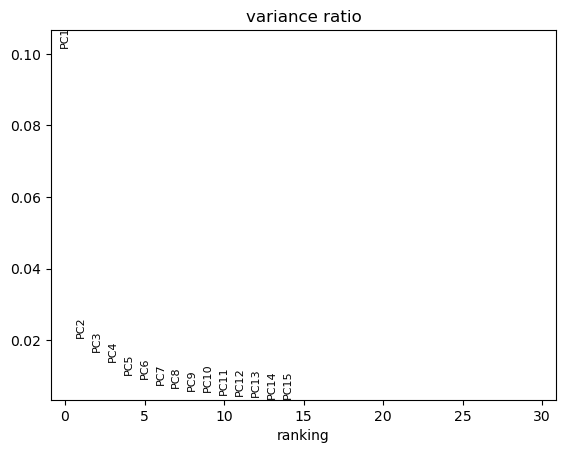

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [4]:
sc.tl.pca(
    adata,
    n_comps=15,
)

sc.pl.pca_variance_ratio(adata)

sc.pp.neighbors(
    adata,
    n_neighbors=5,
)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Leiden clustering
    finished: found 2 clusters and added
    'cc_cluster', the cluster labels (adata.obs, categorical) (0:00:00)


/tmp/ipykernel_3038209/1822404156.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(


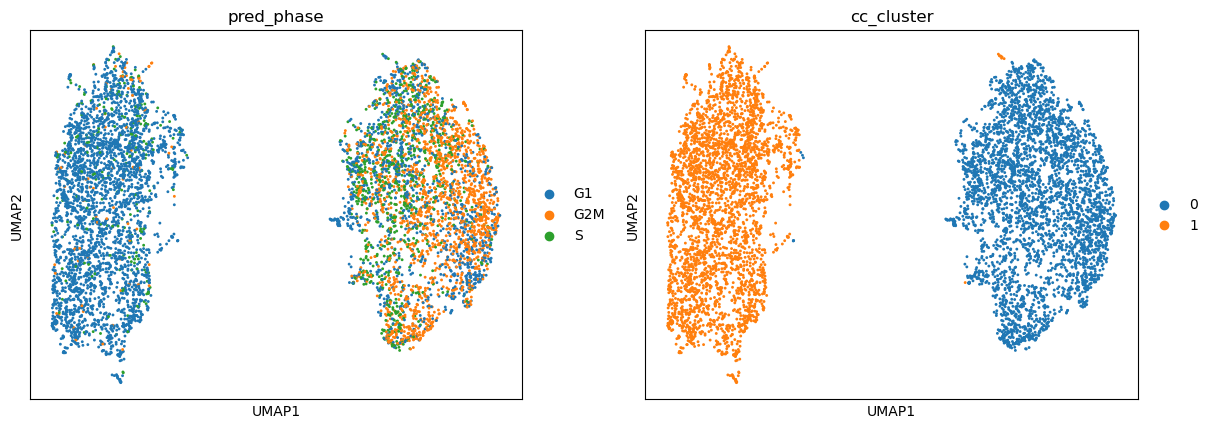

In [5]:
sc.tl.umap(
    adata,
    min_dist=0.1,
)

sc.tl.leiden(
    adata, 
    resolution=0.2,
    key_added='cc_cluster',
)

sc.pl.umap(
    adata,
    color=['pred_phase', 'cc_cluster'],
)